# Hollow Bars Deconvolution Benchmarking

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from flowdec.nb import utils as nbutils 
from flowdec import data as fd_data
from flowdec import restoration as fd_restoration

Load entire hollow bars dataset from local directory for deconvolution performance testing:

In [2]:
acq = fd_data.load_bars()
acq.shape()

{'actual': (128, 256, 256), 'data': (128, 256, 256), 'kernel': (128, 256, 256)}

In [3]:
niter = 25
config = tf.ConfigProto(device_count={'GPU': 1})

Benchmark with redefinition of TF graph in each step:

In [6]:
%%timeit -n 10
import tensorflow as tf
res = fd_restoration.richardson_lucy(acq, niter=niter, session_config=config)

517 ms ± 127 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Benchmark with repeated runs of the same TF graph:

In [9]:
algo = fd_restoration.RichardsonLucyDeconvolver(acq.data.ndim).initialize()

In [10]:
%%timeit -n 10
res = algo.run(acq, niter=niter, session_config=config)

394 ms ± 3.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


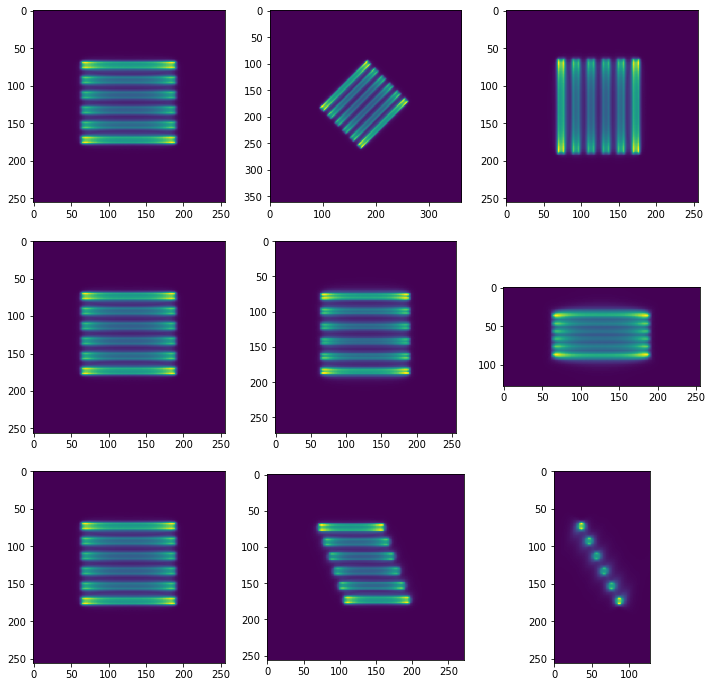

In [13]:
nbutils.plot_rotations(algo.run(acq, niter=niter, session_config=config).data)